<a href="https://colab.research.google.com/github/jibbsmathew/Iris_MLP_NeuralNetwork/blob/main/Iris_MLPNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1 MB 13.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os, sys, itertools, re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import mean
import sklearn.model_selection as models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import timeit
from sklearn.utils.multiclass import unique_labels

In [ ]:
if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
data = pd.read_csv('iris.csv')

In [ ]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#to check how many null values are there in given columns
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [ ]:
# Creating dependent and independent feature for analysis 
y=data['Name'] #independent
x=data.drop('Name', axis=1) #dependent

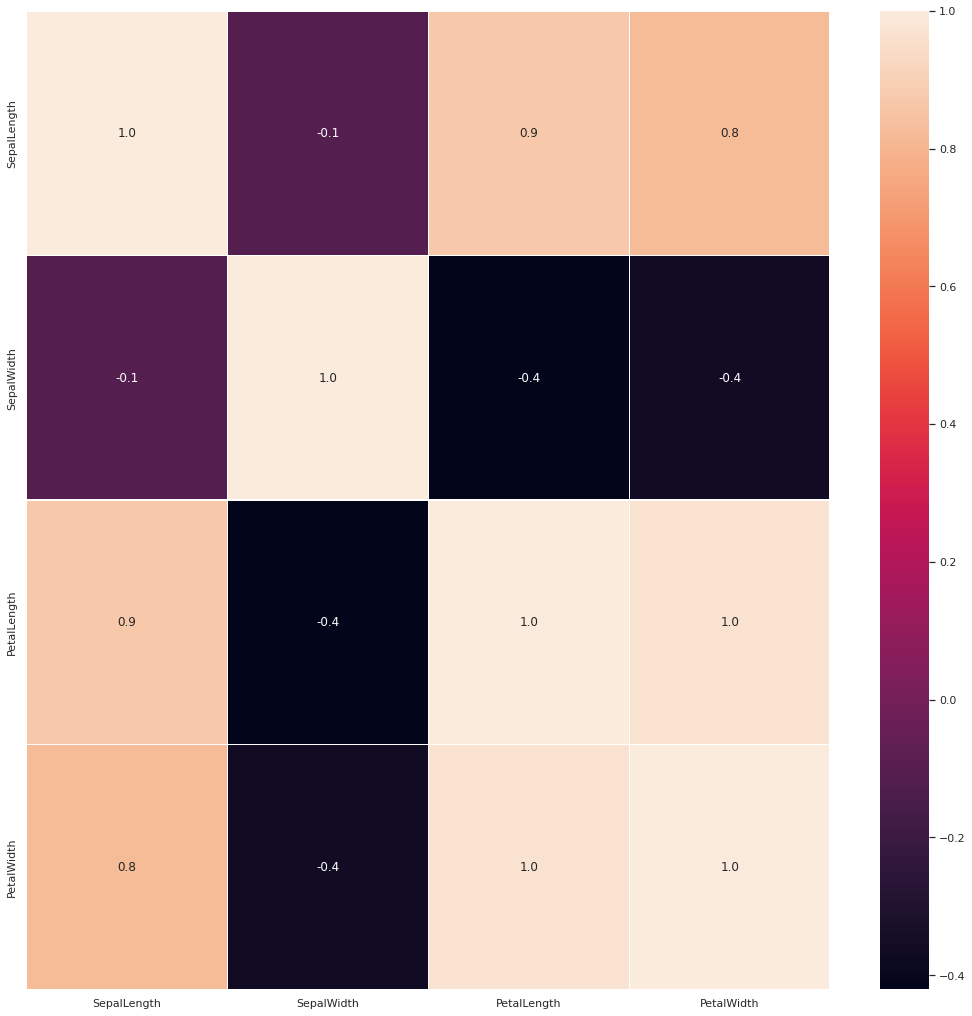

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [ ]:
#Applying HyperParameter tuning (Randomized CV):
from sklearn.model_selection import RandomizedSearchCV
hidden_layer_sizes=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
activation=['identity','logistic','tanh','relu']
solver=['lbfgs','sgd','adam']
learning_rate=['constant','invscaling','adaptive']
random_grid={'hidden_layer_sizes':hidden_layer_sizes,
'activation':activation,
'solver':solver,
'learning_rate':learning_rate}
print(random_grid)

{'hidden_layer_sizes': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}


In [ ]:
# From all those hyperparameter by help of randomized search CV will tell which value of each hyperparameter 
#to be taken in MLP Neural Netwrok classification.
mlp=MLPClassifier()
mlp_randomcv=RandomizedSearchCV(estimator=mlp,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100)
#Fit the randomized model
mlp_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=constant, solver=lbfgs; total time=   9.6s
[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=constant, solver=lbfgs; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=constant, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=constant, solver=lbfgs; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=constant, solver=lbfgs; total time=   4.2s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   2.2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=adaptive, solver=adam; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=adaptive, solver=adam; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=adaptive, solver=adam; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=adaptive, solver=adam; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   2.7s
[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   3.5s
[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=lbfgs; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=lbfgs; total time=   3.0s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=lbfgs; total time=   2.9s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=constant, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=constant, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=sgd; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=sgd; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=sgd; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=adam; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=adam; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=adam; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=adam; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=lbfgs; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=lbfgs; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=invscaling, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=invscaling, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=invscaling, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=invscaling, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=invscaling, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=invscaling, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=invscaling, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=invscaling, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=invscaling, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=invscaling, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=adaptive, solver=lbfgs; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=adaptive, solver=lbfgs; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=800, learning_rate=adaptive, solver=lbfgs; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=invscaling, solver=lbfgs; total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=adam; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=sgd; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=lbfgs; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1000, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   2.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   2.9s
[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=lbfgs; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1800, learning_rate=constant, solver=lbfgs; total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   3.8s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=constant, solver=lbfgs; total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=lbfgs; total time=   5.1s
[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=lbfgs; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=lbfgs; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=invscaling, solver=lbfgs; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=adaptive, solver=lbfgs; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=adaptive, solver=lbfgs; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=adaptive, solver=lbfgs; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1200, learning_rate=adaptive, solver=lbfgs; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=400, learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=400, learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=400, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=400, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=400, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   3.9s
[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   1.5s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=constant, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=constant, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=constant, solver=lbfgs; total time=   0.1s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=adam; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=adam; total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=adam; total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=adam; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=constant, solver=adam; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=600, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=600, learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=600, learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=600, learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=600, learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=lbfgs; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=lbfgs; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=lbfgs; total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=400, learning_rate=constant, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   5.4s
[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=adaptive, solver=lbfgs; total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=adam; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1800, learning_rate=invscaling, solver=adam; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1000, learning_rate=adaptive, solver=adam; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; tota

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1000, learning_rate=invscaling, solver=sgd; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=invscaling, solver=adam; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=invscaling, solver=adam; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=invscaling, solver=adam; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=invscaling, solver=adam; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1400, learning_rate=invscaling, solver=adam; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=1400, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=invscaling, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   5.4s
[CV] END activation=tanh, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   5.5s
[CV] END activation=tanh, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=2000, learning_rate=invscaling, solver=lbfgs; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1200, learning_rate=invscaling, solver=sgd; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=lbfgs; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=1200, learning_rate=constant, solver=adam; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1800, learning_rate=constant, solver=adam; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   5.8s
[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   4.6s
[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1400, learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=1600, learning_rate=adaptive, solver=lbfgs; total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=400, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=400, learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=400, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=400, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=400, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=1000, learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=2000, learning_rate=adaptive, solver=sgd; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=adaptive, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=adaptive, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=adaptive, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=adaptive, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=1200, learning_rate=adaptive, solver=sgd; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=2000, learning_rate=invscaling, solver=sgd; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=adaptive, solver=lbfgs; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=adaptive, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=600, learning_rate=adaptive, solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=400, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=400, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=400, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=400, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=400, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, hidden_layer_sizes=1600, learning_rate=constant, solver=sgd; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=logistic, hidden_layer_sizes=800, learning_rate=constant, solver=sgd; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=600, learning_rate=adaptive, solver=adam; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=800, learning_rate=adaptive, solver=adam; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [200, 400, 600,
                                                               800, 1000, 1200,
                                                               1400, 1600, 1800,
                                                               2000],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=100, verbose=2)

In [ ]:
# Best model parameters:
mlp_randomcv.best_params_


{'activation': 'tanh',
 'hidden_layer_sizes': 800,
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [ ]:
# Best model parameters:

mlp_randomcv.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=800, solver='sgd')

In [ ]:
best_random_grid=mlp_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print("Confusion Matrix:")
cm1=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 8  0  0]
 [ 0  8  0]
 [ 0  0 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0


In [ ]:
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.5333333333333333
Sensitivity :  1.0
Specificity :  1.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_test)

LabelEncoder()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(le.transform(y_test) == i, le.transform(y_pred) == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

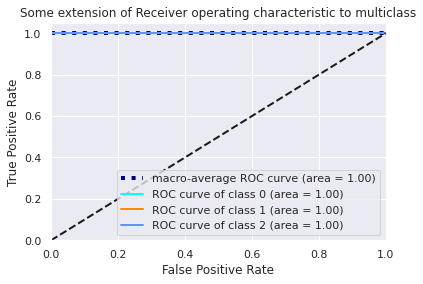

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(le.transform(y_test) == i, le.transform(y_pred) == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
